# Title

### Load required packages

In [1]:
import xarray as xr
import random
import os

Download NetCDF datafile from online archive

In [2]:
#os.system('wget -q https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EE3C40/SEZDE4 -O argo_data.nc');

Open dataset using xarray, drop data variables that aren't needed

In [3]:
ds = xr.open_dataset('argo_data.nc', decode_times=False)

ds = ds.drop({'prof_descr','prof_date',
              'prof_T','prof_Tweight',
              'prof_S','prof_Sweight',
              'prof_TeccoV4R2','prof_SeccoV4R2'})

ds

<xarray.Dataset>
Dimensions:             (iDEPTH: 56, iPROF: 10386)
Dimensions without coordinates: iDEPTH, iPROF
Data variables:
    prof_depth          (iDEPTH) float64 ...
    prof_lon            (iPROF) float64 ...
    prof_lat            (iPROF) float64 ...
    prof_TeccoV4R2clim  (iPROF, iDEPTH) float64 ...
    prof_SeccoV4R2clim  (iPROF, iDEPTH) float64 ...
Attributes:
    Format:       The contents of this MITprof file were processed \nusing th...
    date:         02-Apr-2016
    Conventions:  CF-1.6
    title:        Observed and estimated profiles
    institution:  MIT
    references:   Forget, G., J.-M. Campin, P. Heimbach, C. N. Hill, R. M. Po...
    history:      2016/03/22 -- formatting for online publication -- GF

### Plot example temperature profile 

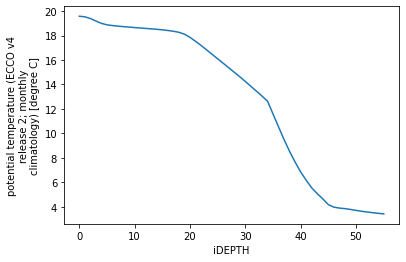

In [4]:
ds.sel(iPROF=7086).prof_TeccoV4R2clim.plot()

### Plot example salinity profile

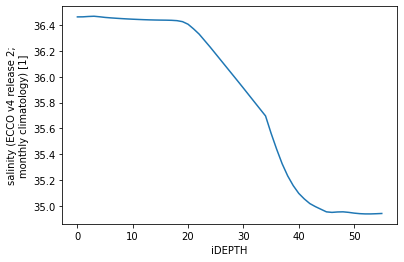

In [5]:
ds.sel(iPROF=7086).prof_SeccoV4R2clim.plot()

### Select four depths (approx. 5m, 100m, 500m, and 1000m depth)

In [6]:
ds = ds.sel(iDEPTH=[0,10,34,44])

### Select polar profiles, drop profiles with NaNs, and select random subsample

In [7]:
in_latrange_polar = (ds.prof_lat > 60)
ds_polar = ds.where(in_latrange_polar, drop=True).dropna(dim='iPROF', how='any')
ds_polar = ds_polar.isel(iPROF=sorted(random.sample(range(0,ds_polar.iPROF.size-1),150)))

### Select polar profiles, drop profiles with NaNs, and select random subsample

In [8]:
in_latrange_subtropical = (ds.prof_lat > 23) & (ds.prof_lat <= 60)
ds_subtropical = ds.where(in_latrange_subtropical, drop=True).dropna(dim='iPROF', how='any')
ds_subtropical = ds_subtropical.isel(iPROF=sorted(random.sample(range(0,ds_subtropical.iPROF.size-1),150)))

### Select polar profiles, drop profiles with NaNs, and select random subsample

In [9]:
in_latrange_tropical = (ds.prof_lat >= 0) & (ds.prof_lat <= 23)
ds_tropical = ds.where(in_latrange_tropical).dropna(dim='iPROF', how='any')
ds_tropical = ds_tropical.isel(iPROF=sorted(random.sample(range(0,ds_tropical.iPROF.size-1),150)))